#   Угол отклонения от начального "подвеса"

    acos( (tan(a0) * tan(a) + tan(b0) * tan(b) + 1)/sqrt((tan(a0)^2+tan(b0)^2+1)*(tan(a)^2+tan(b)^2+1)) )
    Вроде скобки нигде не потерял.
    a0 и b0 - начальные углы полёта (перевести в радианы из градусов)

In [1]:
!date
!pwd

Пт авг 14 19:04:39 MSK 2020
/home/alena/SPHERE/Analysis/Telemetry


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime as dt
from math import pi
#чтобы датасеты с множеством колонок отображались полностью
pd.set_option('display.max_rows', 100, 'display.max_columns', 200)

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

## Чтение данных

In [4]:
dirname = '~/SPHERE/ExpData/Data.telemetry/'
!ls $dirname

2012_calibr_testrun	      datum_2012_sec.csv
2012_events.csv		      datum_2013_min.csv
2013_events.csv		      datum_2013_sec.csv
current_hv_code_everymin.dat  datum_2013_sec_H_correction.csv
currents_corrected.txt	      high_code.dat
datum_2009_sec.csv	      high_kod.dat
datum_2010_min.csv	      telemetry_min.csv
datum_2010_sec.csv	      V_ham_2012.dat
datum_2011_min.csv	      V_ham_2012_initial.dat
datum_2011_sec.csv	      V_ham_2013.dat
datum_2012_min.csv


In [16]:
name = 'telemetry_min.csv'
datum = pd.read_csv(dirname + name, index_col=0)
print(datum.shape)
datum['r2'] = datum.dN ** 2 + datum.dE ** 2
datum.head()

(7169, 37)


,mm,year,month,day,time,N,E,H,H-455,Gqi,Gsn,Ghdp,Ggs,compass,P0_code,T0_code,P_hpa0,"T0,C",P1_code,T1_code,P_hpa1,"T1,C","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C","Bot,C","Top,C",Clin1,Clin2,ClinTh,run,dN,dE,utime,r2
0,0,2010,3,7,123952,5148.0891,10424.4104,1416.1,961.1,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,19.8,NaN,NaN,NaN,1,13.729398,103.538340,12:39:52,10908.684208
1,1,2010,3,7,124506,5148.0893,10424.4058,1418.2,963.2,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,20.0,NaN,NaN,NaN,1,14.100462,98.246380,12:45:06,9851.174302
2,2,2010,3,7,124607,5148.0878,10424.4010,1419.4,964.4,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,18.6,NaN,NaN,NaN,1,11.317476,92.724336,12:46:07,8725.887684
3,3,2010,3,7,124708,5148.0828,10424.4001,1419.5,964.5,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.6,NaN,NaN,NaN,1,2.040856,91.688952,12:47:08,8411.029050
4,4,2010,3,7,124809,5148.0810,10424.4045,1419.8,964.8,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.8,NaN,NaN,NaN,1,-1.298727,96.750827,12:48:09,9362.409139


In [6]:
def plot_for_paper(year, name, yaxislabel, file=None):

    flights = datum[ (datum.year == year) ].run.max()
        
    # проверка на существование
    nodata = 0
    for i in range(1, flights + 1):
        data = datum[ (datum.year == year) & (datum.run == i) ]
        if len(data[['utime', name]].dropna()) == 0:
            nodata += 1
    if nodata == flights:
        return
    
    # рисование
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-', 'k*--']
    fig, ax = plt.subplots()

    for i in range(1, flights + 1):
        data = datum[ (datum.year == year) & (datum.run == i) ]
        data = data[['utime', name]].dropna()
        x = [dt.datetime.strptime(i, '%H:%M:%S') for i in data.utime]
        y = data[name]
        #print(year, i, len(y))   

        #label = 'flight ' + str(i)
        label = str(i)
        ax.plot(x, y, plcol[i-1], alpha=0.9, label = label)

    if name in ['H-455','ClinTh']:
        plt.ylim(0)
     
    ax.xaxis.set_major_formatter(fmt)
    plt.xlabel('Flight time, UTC')
    plt.ylabel(yaxislabel)
    ax.set_title(str(year))
    plt.legend(borderaxespad=0.1)
    plt.grid()
    
    # save file
    if file:
        plt.savefig(file, bbox_inches='tight')    

### Наклоны

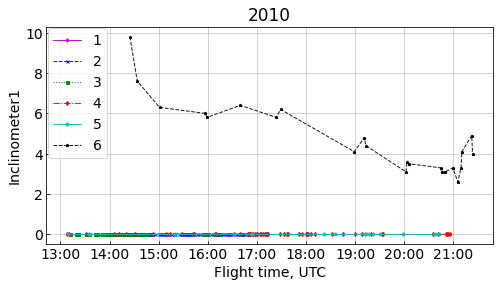

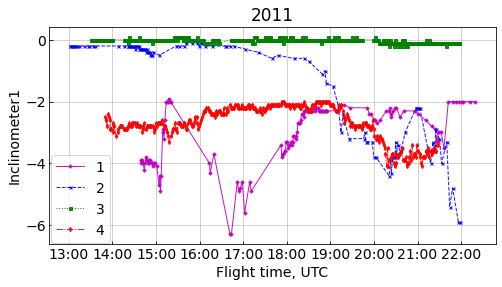

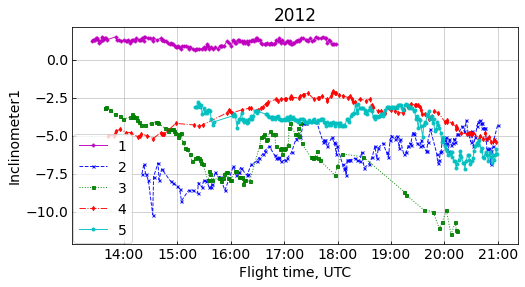

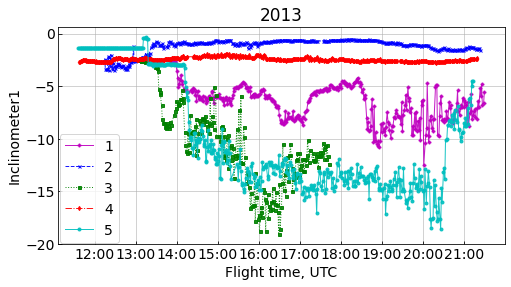

In [7]:
for year in range(2010, 2014):
    plot_for_paper(year, 'Clin1',  'Inclinometer1', str(year) + '_clin1.pdf')

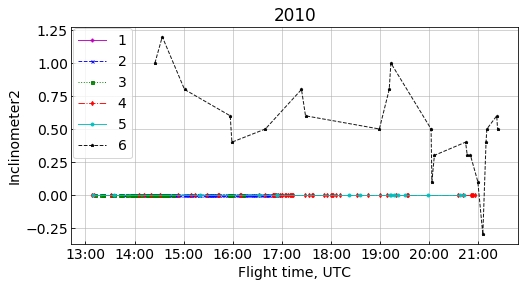

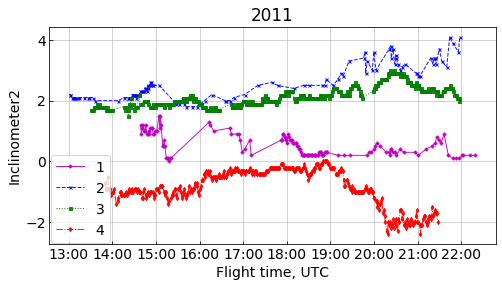

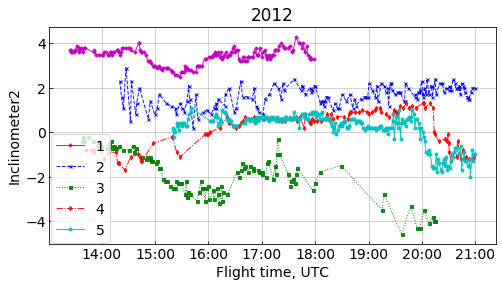

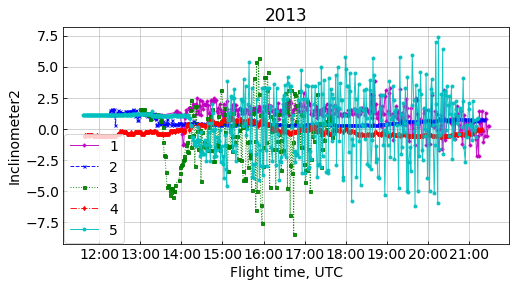

In [11]:
for year in range(2010, 2014):
    plot_for_paper(year, 'Clin2',  'Inclinometer2', str(year) + '_clin2.pdf')

### Определение первоначального подвеса

# 2011

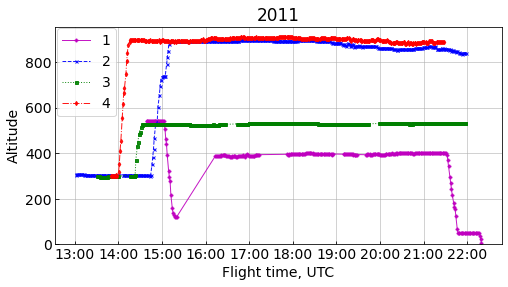

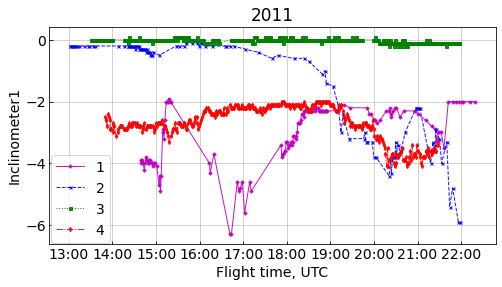

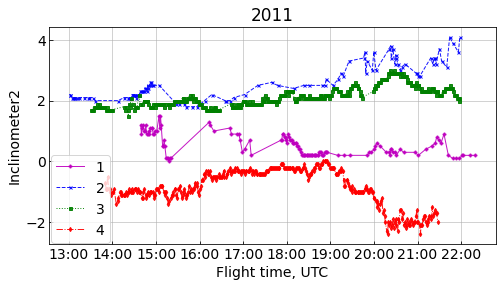

In [8]:
year = 2011
plot_for_paper(year, 'H-455',  'Altitude')
plot_for_paper(year, 'Clin1',  'Inclinometer1')
plot_for_paper(year, 'Clin2',  'Inclinometer2')

In [26]:
for run in range(1,6):
    df = datum[(datum.year == 2011) & (datum.run == run) & (np.isnan(datum.Clin1)==False)]
    print(run, df[df.r2 == df.r2.min()][['H', 'r2','Clin1', 'Clin2']] )
# -2.0, -0.2, -0.0, -2.5
#  0.2,  2.0,  1.7, -0.7

1          H         r2  Clin1  Clin2
248  620.5  10.424489   -2.0    0.2
2          H          r2  Clin1  Clin2
321  760.7  355.369014   -0.2    2.0
3          H          r2  Clin1  Clin2
719  754.5  277.353088   -0.0    1.7
4           H          r2  Clin1  Clin2
1066  756.3  871.470743   -2.5   -0.7
5 Empty DataFrame
Columns: [H, r2, Clin1, Clin2]
Index: []


## 2012

In [27]:
for run in range(1,6):
    df = datum[(datum.year == 2012) & (datum.run == run) & (np.isnan(datum.Clin1)==False)]
    print(run, df[df.r2 == df.r2.min()][['H', 'r2','Clin1', 'Clin2']] )
#  [ 0.8, -4.0, -4.2, -2.2, -3.1]
#  [ 2.7,  2.0, -1.3,  0.4,  0.1]

1         H           r2  Clin1  Clin2
93  960.2  7404.012191    0.8    2.7
2          H           r2  Clin1  Clin2
514  860.7  4555.608251   -4.0    2.0
3           H            r2  Clin1  Clin2
696  1041.3  28709.628889   -4.2   -1.3
4            H           r2  Clin1  Clin2
1030  1041.9  3044.241557   -2.2    0.4
5            H          r2  Clin1  Clin2
1328  1040.8  5571.02563   -3.1    0.1


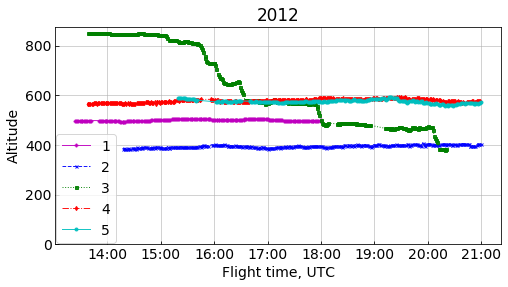

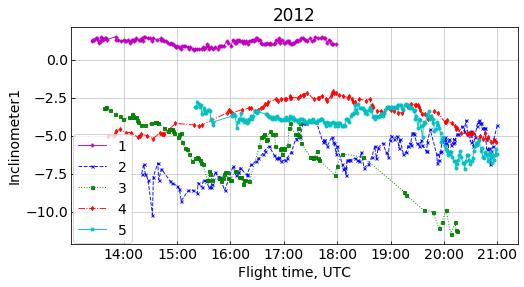

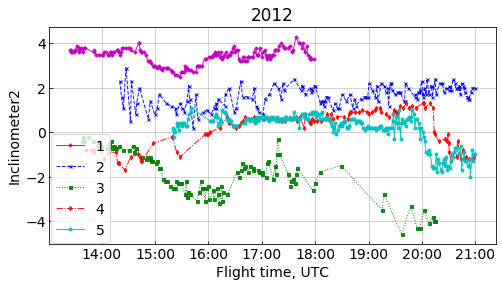

In [55]:
year = 2012
plot_for_paper(year, 'H-455',  'Altitude')
plot_for_paper(year, 'Clin1',  'Inclinometer1')
plot_for_paper(year, 'Clin2',  'Inclinometer2')

In [56]:
### первоначальный подвес
run = 1
params = ['year', 'day','run', 'time', 'N', 'E', 'H-455', 'Clin1', 'Clin2']
df = datum[params][datum.year == year]
df = df[df.run == run]
df[: 7] 

,year,day,run,time,N,E,H-455,Clin1,Clin2
0,2012,13,1,132356,5147.8548,10423.2342,496.9,1.2,3.7
1,2012,13,1,132456,5147.8548,10423.2338,496.8,1.3,3.6
2,2012,13,1,132556,5147.8549,10423.2335,496.8,1.3,3.7
3,2012,13,1,132656,5147.8553,10423.2334,497.0,1.3,3.6
4,2012,13,1,132857,5147.8556,10423.2321,497.1,1.4,3.6
5,2012,13,1,132957,5147.8555,10423.2318,497.2,1.4,3.7
6,2012,13,1,133057,5147.8556,10423.2317,497.4,1.3,3.7


## 2013 год

In [29]:
# from min distance from start point
for run in range(1,6):
    df = datum[(datum.year == 2013) & (datum.run == run) & (np.isnan(datum.Clin1)==False)]
    print(run, df[df.r2 == df.r2.min()][['H', 'r2','Clin1', 'Clin2']] )
    
#    -2.5, -0.6, -2.4, -2.6, -0.4
#     1.4,  0.3,  1.5, -0.6,  1.2

1         H          r2  Clin1  Clin2
16  763.3  199.620735   -2.5    1.4
2           H        r2  Clin1  Clin2
643  1056.2  1.156828   -0.6    0.3
3          H         r2  Clin1  Clin2
811  610.4  53.679755   -2.4    1.5
4           H         r2  Clin1  Clin2
1038  512.8  47.134023   -2.6   -0.6
5           H   r2  Clin1  Clin2
1608  447.8  0.0   -0.4    1.2
1609  447.9  0.0   -0.4    1.2


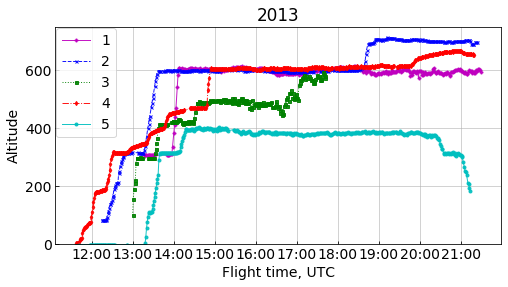

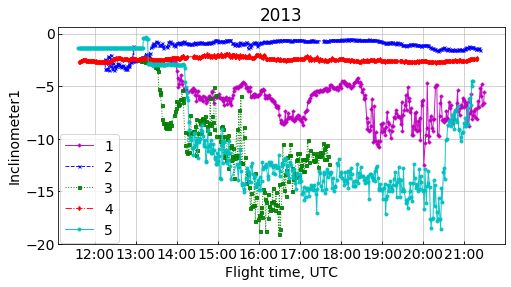

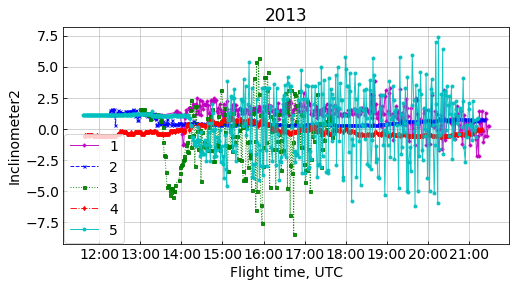

In [32]:
year = 2013
plot_for_paper(year, 'H-455',  'Altitude')
plot_for_paper(year, 'Clin1',  'Inclinometer1')
plot_for_paper(year, 'Clin2',  'Inclinometer2')

In [54]:
### первоначальный подвес
# 2013 flight 2
params = ['year', 'day','run', 'time', 'N', 'E', 'H-455', 'Clin1', 'Clin2']
df = datum[params][datum.year == 2013]
df = df[df.run == 2]
df[: 7] 

,year,day,run,time,N,E,H-455,Clin1,Clin2
377,2013,11,2,121439,5147.8074,10423.3252,82.6,-2.4,1.1
378,2013,11,2,121539,5147.8051,10423.3198,82.6,-3.4,1.5
379,2013,11,2,121639,5147.8059,10423.3197,82.5,-3.4,1.3
380,2013,11,2,121739,5147.8058,10423.3206,83.0,-3.4,1.5
381,2013,11,2,121839,5147.8057,10423.3201,82.4,-3.4,1.6
382,2013,11,2,121939,5147.8104,10423.3303,83.2,-2.1,1.1
383,2013,11,2,122039,5147.8075,10423.3190,83.6,-3.5,1.4


In [91]:
### первоначальный подвес
# 2013 flight 3
run = 3
params = ['year', 'day','run', 'time', 'N', 'E', 'H-455', 'Clin1', 'Clin2']
df = datum[params][datum.year == 2013]
df = df[df.run == run]
df[: 7] 

,year,day,run,time,N,E,H-455,Clin1,Clin2
810,2013,13,3,125959,5147.8115,10423.3328,99.5,-2.4,1.6
811,2013,13,3,130059,5147.8115,10423.3208,155.4,-2.4,1.5
812,2013,13,3,130159,5147.8092,10423.3217,190.6,-2.4,1.6
813,2013,13,3,130259,5147.8106,10423.3219,209.4,-2.4,1.5
814,2013,13,3,130359,5147.8105,10423.3218,222.7,-2.5,1.5
815,2013,13,3,130459,5147.8130,10423.3359,278.3,-2.5,1.6
816,2013,13,3,130559,5147.8270,10423.3482,295.6,-2.5,1.2


In [48]:
### первоначальный подвес
# 2013 flight 4
df = datum[params][datum.year == 2013]
df = df[df.run == 4]
df[: 10] 

,year,day,run,time,N,E,H-455,Clin1,Clin2
1025,2013,14,4,113739,5147.8214,10423.3205,3.9,-2.7,-0.6
1026,2013,14,4,113839,5147.8215,10423.3209,4.1,-2.7,-0.6
1027,2013,14,4,113939,5147.8216,10423.3209,4.9,-2.6,-0.5
1028,2013,14,4,114039,5147.8216,10423.3208,5.9,-2.6,-0.6
1029,2013,14,4,114139,5147.8215,10423.3205,7.5,-2.6,-0.5
1030,2013,14,4,114239,5147.8213,10423.3193,13.1,-2.5,-0.5
1031,2013,14,4,114338,5147.8208,10423.3178,16.6,-2.5,-0.5
1032,2013,14,4,114439,5147.8196,10423.3155,18.9,-2.5,-0.5
1033,2013,14,4,114539,5147.8187,10423.3141,22.4,-2.5,-0.6
1034,2013,14,4,114639,5147.8186,10423.3142,38.7,-2.6,-0.5


In [47]:
### первоначальный подвес
# 2013 flight 5
df = datum[params][datum.year == 2013]
df = df[df.run == 5]
df[df['H-455'] > 0][: 3] 

,year,day,run,time,N,E,H-455,Clin1,Clin2
1613,2013,15,5,131820,5147.8161,10423.3262,4.7,-2.9,1.0
1614,2013,15,5,131920,5147.8173,10423.3267,26.2,-2.9,1.0
1615,2013,15,5,132020,5147.8196,10423.3250,56.2,-2.8,1.1


In [45]:
### первоначальный наклон на земле
# 2013 flight 5
df = datum[params][datum.year == 2013]
df = df[df.run == 5]
df[df['H-455'] <= 0][: 3] 

,year,day,run,time,N,E,H-455,Clin1,Clin2
1511,2013,15,5,113620,5147.8094,10423.3357,-4.8,-1.4,1.1
1512,2013,15,5,113720,5147.8094,10423.3358,-4.7,-1.4,1.1
1513,2013,15,5,113820,5147.8094,10423.3358,-4.5,-1.4,1.1


# Отклонение от первоначального подвеса

In [30]:
pi = 3.14151926535
def grad_to_rad(x):
    return x * pi / 180

def rad_to_grad(x):
    return x * 180 / pi

#print(rad_to_grad(pi))
#print(grad_to_rad(180))

In [92]:
from math import sqrt
### Отклонение от первоначального подвеса
### acos( (tan(a0) * tan(a) + tan(b0) * tan(b) + 1)/sqrt((tan(a0)^2+tan(b0)^2+1)*(tan(a)^2+tan(b)^2+1)) )
def deflection(a0, b0, a, b):
    a0 = grad_to_rad(a0)
    b0 = grad_to_rad(b0)
    a = grad_to_rad(a)
    b = grad_to_rad(b)
    return rad_to_grad(
          np.arccos( (np.tan(a0) * np.tan(a) + np.tan(b0) * np.tan(b) + 1) / 
                sqrt((np.tan(a0) ** 2 + np.tan(b0) ** 2 + 1) * 
                     (np.tan(a)  ** 2 + np.tan(b)  ** 2 + 1)) 
                   )
    )

print(deflection(-2.4, 1.5, 0, 0))
print(deflection(-2.4, 1.5, -2.4, 1.5))

def calc_deflection(a, b, year, run):
    if year == 2013:
        #a0 = [-2.3, -1.2, -2.5, -2.6, -2.9]  # from debug
        #b0 = [ 1.4, -1.1,  1.5, -0.6,  1.0]  # from debug
        #a0 = [-2.5, -0.6, -2.4, -2.6, -0.4]   # from min distance from start point
        #b0 = [ 1.4,  0.3,  1.5, -0.6,  1.2]   # from min distance from start point
        a0 = [-2.3, -1.0, -2.3, -2.6, -2.5]   # from min distance from start point
        b0 = [ 1.4, -1.1,  1.5, -0.6,  1.2]   # from min distance from start point
    elif year == 2012:
        a0 = [ 0.8, -4.0, -4.2, -2.2, -3.1]
        b0 = [ 2.7,  2.0, 1.3,  0.4,  0.1]
    elif year == 2011:
        a0 = [-2.0, -0.2, -1.2, -2.5]
        b0 = [ 0.2,  2.0,  1.7, -0.1]
    else:
        #print("Unknown year!")
        return 0
    
    return deflection(a0[run - 1], b0[run - 1], a, b)

2.8292653917797463
0.0


In [92]:
a0 = [-2.3, -1.2, -2.5, -2.6, -2.9]
b0 = [ 1.4, -1.1,  1.5, -0.6,  1.0]

In [97]:
run = 3
params = ['year', 'day','run', 'utime', 'dN', 'dE', 'H-455', 'Clin1', 'Clin2']
df = datum[params][datum.year == 2013]
df = df[df.run == run]
df['dev'] = df.apply(lambda row: calc_deflection(row['Clin1'], row['Clin2'], row['year'], row['run']), axis = 1)

In [93]:
datum['dev'] = datum.apply(lambda row: calc_deflection(row['Clin1'], row['Clin2'], row['year'], row['run']), axis = 1)

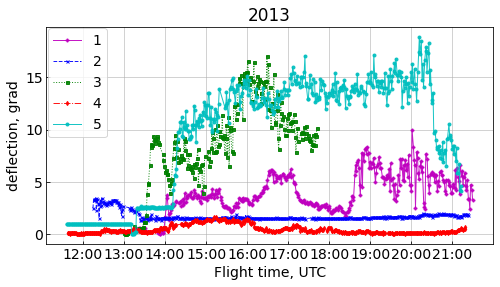

In [41]:
year=2013
plot_for_paper(year, 'dev',  'deflection, grad')

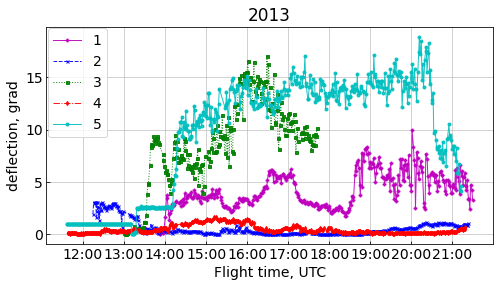

In [33]:
year=2013
plot_for_paper(year, 'dev',  'deflection, grad')

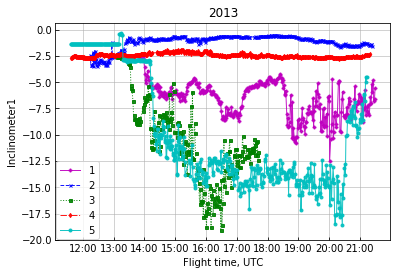

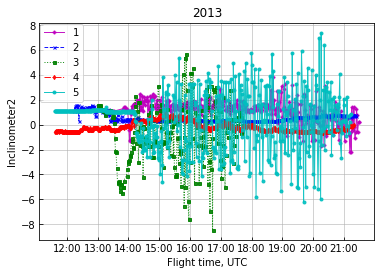

In [106]:
plot_for_paper(year, 'Clin1',  'Inclinometer1')
plot_for_paper(year, 'Clin2',  'Inclinometer2')

In [89]:
datum['dev'] = datum.apply(lambda row: calc_deflection(row['Clin1'], row['Clin2'], row['year'], row['run']), axis = 1)

2011 1 0.0
2011 2 0.0
2011 3 0.0
2011 4 0.0
2012 1 0.5379849079384544
2012 2 0.9995102832344211
2012 3 3.110546632863517
2012 4 0.09990483837435356
2012 5 0.3161975382714247
2013 1 0.0
2013 2 0.0
2013 3 0.0
2013 4 0.0
2013 5 0.0


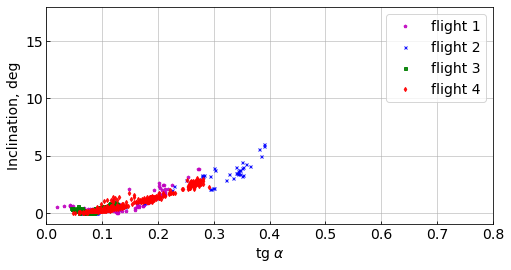

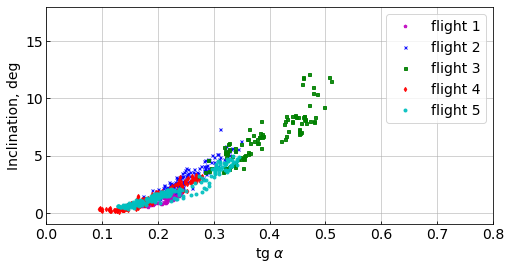

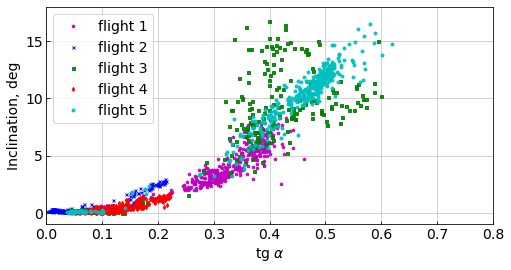

In [536]:
""" наклон при разных сносах установки """
plcol = ['mp-','bx--', 'gs:', 'rd-.', 'co-']
params = ['H-455', 'dev', 'dE', 'dN']
for year in range(2011, 2014):
    fig = plt.figure(figsize=(8,4))
    for i in range(1,6):
        if year == 2011 and i == 5:
            continue
        data = datum[(datum.run == i) & (datum["H-455"] > 100) & (datum.year == year)][params].dropna()
        x = data.dE
        y = data.dN
        r = (x * x + y * y) ** 0.5    
        x = r/data['H-455']
        #y = data.ClinTh - data.ClinTh.min()
        #y = (data.Clin1*data.Clin1 + data.Clin2 * data.Clin2) ** 0.5
        y = data.dev
        ymin = min(y)
        print(year, i, ymin)
        #y = y - ymin
        label = 'flight ' + str(i)
        plt.plot(x, y, plcol[i-1][0:2],  alpha=0.9, label = label)

    plt.legend(loc=0)
    plt.xlim(0, 0.8)
    plt.ylim(-1, 18)
    plt.xlabel('tg $\\alpha$')
    plt.ylabel("Inclination, deg")
    plt.grid()

#plt.savefig(str(year) + '_tg-inclination.pdf', bbox_inches='tight')

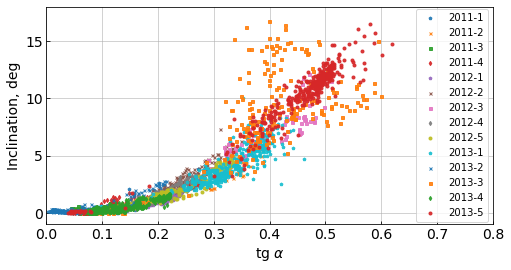

In [535]:
""" наклон при разных сносах установки """
fig = plt.figure(figsize=(8,4))

plcol = ['p-','x--', 's:', 'd-.', 'o-']
for year in range(2011, 2014):
    if year == 2013:
        color = 'b'
    elif year == 2012:
        color = 'g'
    for i in range(1,6):
        if year == 2011 and i == 5:
            continue
        data = datum[(datum.run == i) & (datum["H-455"] > 290) & (datum.year == year)][params].dropna()
        x = data.dE
        y = data.dN
        r = (x * x + y * y) ** 0.5    
        x = r/data['H-455']
        y = data.dev
        ymin = min(y)
        #y = y - ymin
        label = str(year) + '-' + str(i)
        plt.plot(x, y, plcol[i-1][0:1], alpha=0.9, label = label)

plt.legend(loc=5, fontsize=10)
#plt.legend( loc='center right', bbox_to_anchor=(1.18, 0.5), fontsize=10)

plt.xlim(0, 0.8)
plt.ylim(-1, 18)
plt.xlabel('tg $\\alpha$')
plt.ylabel("Inclination, deg")
plt.grid()

#plt.savefig('2013_tg-inclination.pdf', bbox_inches='tight')

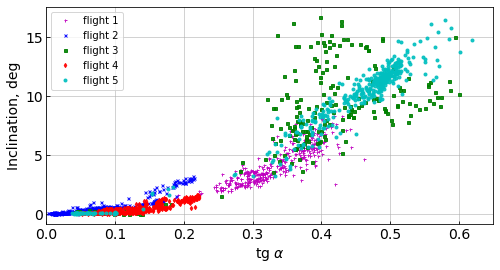

In [251]:
""" наклон при разных сносах установки """
fig = plt.figure(figsize=(8,4))

plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-']
for i in range(1,6):
    data = datum[(datum.run == i)  & (datum["H-455"] > 100) & (datum.year == year)]
    x = data.dE
    y = data.dN
    r = (x * x + y * y) ** 0.5    
    x = r/data['H-455']
    #y = data.ClinTh - data.ClinTh.min()
    #y = (data.Clin1*data.Clin1 + data.Clin2 * data.Clin2) ** 0.5
    y = data.dev
    ymin = min(y)
    #y = y - ymin
    label = 'flight ' + str(i)
    plt.plot(x, y, plcol[i-1][0:2],  alpha=0.9, label = label)

plt.legend(loc=0, fontsize=10)
plt.xlim(0)
#plt.ylim(0)
plt.xlabel('tg $\\alpha$')
plt.ylabel("Inclination, deg")
plt.grid()

plt.savefig('2013_tg-inclination.pdf', bbox_inches='tight')

# Подбор точек начального отвеса

In [332]:
""" наклон при разных сносах установки """
def plot_tg():
    fig = plt.figure(figsize=(8,4))

    plcol = ['mp-','bx--', 'gs:', 'rd-.', 'co-']
    for i in range(1,6):
        if year == 2011 and i == 5:
            continue
        data = datum[(datum.run == i)  & (datum["H-455"] > 300) & (datum.year == year)][params].dropna()
        x = data.dE
        y = data.dN
        r = (x * x + y * y) ** 0.5    
        x = r/data['H-455']
        #y = data.ClinTh - data.ClinTh.min()
        #y = (data.Clin1*data.Clin1 + data.Clin2 * data.Clin2) ** 0.5
        y = data.dev
        ymin = min(y)
        print(ymin)
        #y = y - ymin
        label = 'flight ' + str(i)
        plt.plot(x, y, plcol[i-1][0:2],  alpha=0.9, label = label)

    plt.legend(loc=0)
    plt.xlim(0, 0.7)
    plt.ylim(-1, 18)
    plt.xlabel('tg $\\alpha$')
    plt.ylabel("Inclination, deg")
    plt.grid()

In [532]:
from math import sqrt
### Отклонение от первоначального подвеса
### acos( (tan(a0) * tan(a) + tan(b0) * tan(b) + 1)/sqrt((tan(a0)^2+tan(b0)^2+1)*(tan(a)^2+tan(b)^2+1)) )
def deflection(a0, b0, a, b):
    a0 = grad_to_rad(a0)
    b0 = grad_to_rad(b0)
    a = grad_to_rad(a)
    b = grad_to_rad(b)
    return rad_to_grad(
          np.arccos( (np.tan(a0) * np.tan(a) + np.tan(b0) * np.tan(b) + 1) / 
                sqrt((np.tan(a0) ** 2 + np.tan(b0) ** 2 + 1) * 
                     (np.tan(a)  ** 2 + np.tan(b)  ** 2 + 1)) 
                   )
    )


def calc_deflection(a, b, year, run):
    if year == 2013:
        #a0 = [-2.3, -1.2, -2.5, -2.6, -2.9]  # from debug
        #b0 = [ 1.4, -1.1,  1.5, -0.6,  1.0]  # from debug
        #a0 = [-2.5, -0.6, -2.4, -2.6, -0.4]   # from min distance from start point
        #b0 = [ 1.4,  0.3,  1.5, -0.6,  1.2]   # from min distance from start point
        a0 = [-2.5, -0.8, -2.6, -2.6, -2.9]   # from min distance from start point
        b0 = [ 1.4,  0.3,  1.3, -0.6,  1.1]   # from min distance from start point
    elif year == 2012:
        #a0 = [ 0.8, -4.0, -4.2, -2.2, -3.1]
        #b0 = [ 2.7,  2.0, 1.3,  0.4,  0.1]
        a0 = [ 0.1, -3.0, -1.0, -2.5, -2.5]
        b0 = [ 2.5,  1.8, 2.0,  0.4,  0.1]
    elif year == 2011:
        #a0 = [-2.0, -0.2, -1.2, -2.5]
        #b0 = [ 0.2,  2.0,  1.7, -0.1]
        a0 = [-2.5, -0.2,  -0.0, -2.0]
        b0 = [ 0.4,  2.1,  2.1, -0.1]
    else:
        #print("Unknown year!")
        return 0
    
    return deflection(a0[run - 1], b0[run - 1], a, b)

0.0
0.0
1.561114624794017
0.0
0.0


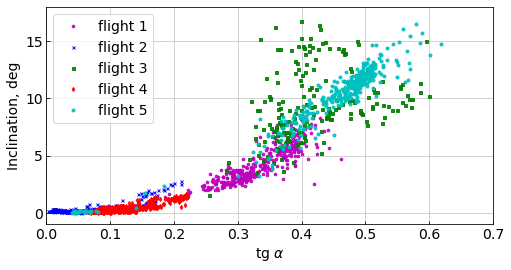

In [524]:
plot_tg()

0.0
0.0
1.561114624794017
0.0
0.0


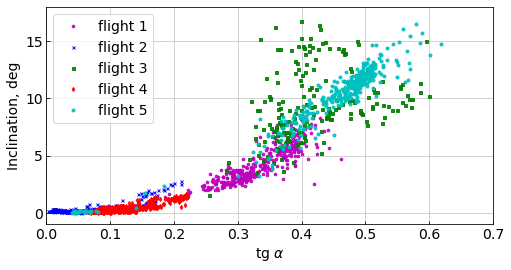

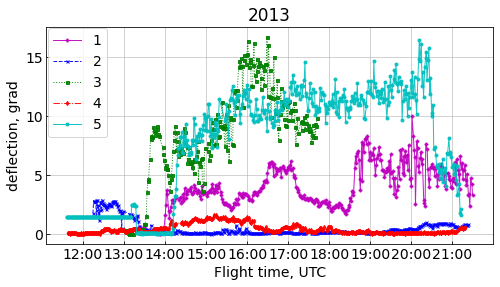

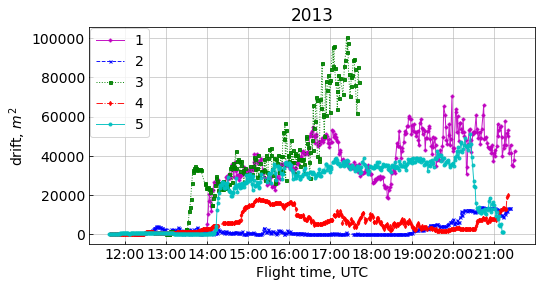

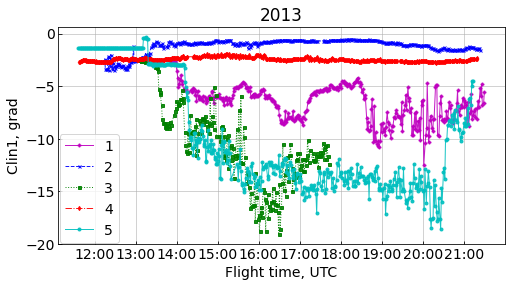

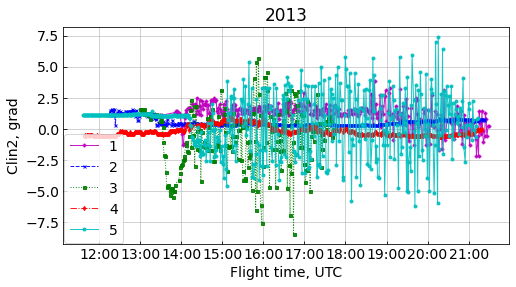

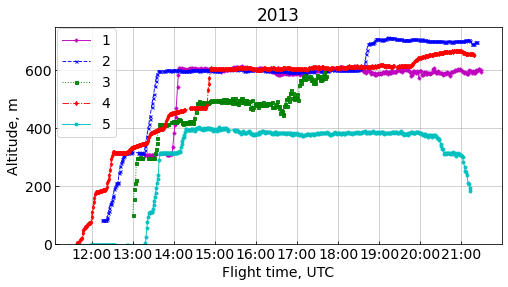

In [534]:
datum['dev'] = datum.apply(lambda row: calc_deflection(row['Clin1'], row['Clin2'], row['year'], row['run']), axis = 1)

year=2013
plot_tg()
plot_for_paper(year, 'dev',   'deflection, grad')
plot_for_paper(year, 'r2',    'drift, $m^2$')
plot_for_paper(year, 'Clin1', 'Clin1, grad')
plot_for_paper(year, 'Clin2', 'Clin2, grad')
plot_for_paper(year, 'H-455', 'Altitude, m')

In [517]:
datum[(datum.run == 3)  & (datum["H-455"] > 100) & (datum.year == 2012)].Clin2.min()

-4.6